<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [23]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-24-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [25]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [26]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


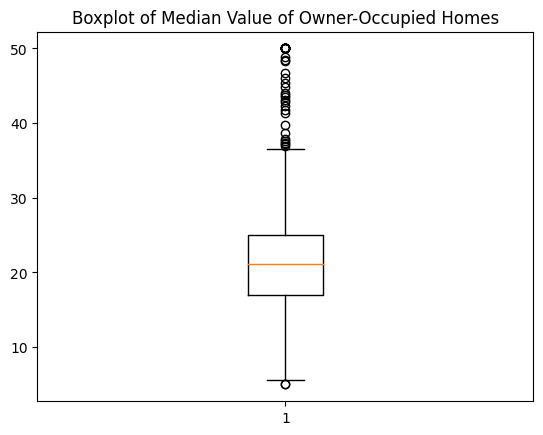

In [27]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.show()


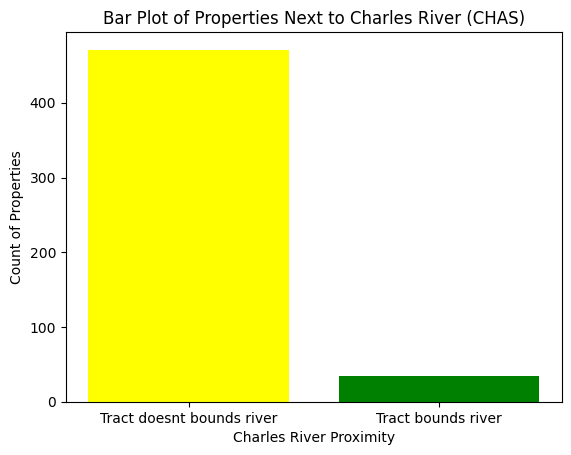

In [29]:
counts = boston_df['CHAS'].value_counts().sort_index()
categories = ['Tract doesnt bounds river', 'Tract bounds river']
pyplot.bar(categories, counts, color=['yellow', 'green'])
pyplot.title('Bar Plot of Properties Next to Charles River (CHAS)')
pyplot.ylabel('Count of Properties')
pyplot.xlabel('Charles River Proximity')
pyplot.show()

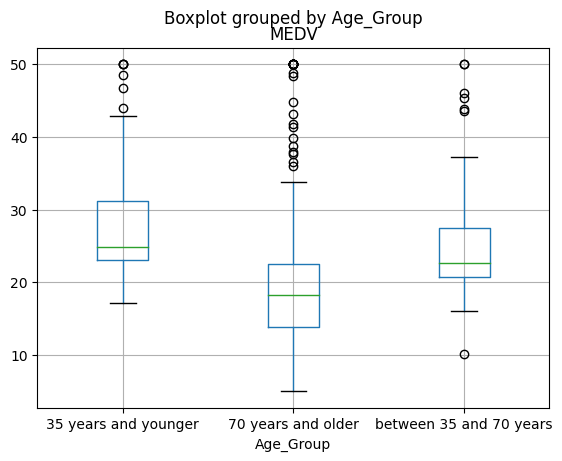

In [30]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
boston_df.boxplot(column='MEDV', by='Age_Group')
 

# Displaying the plot
pyplot.show()

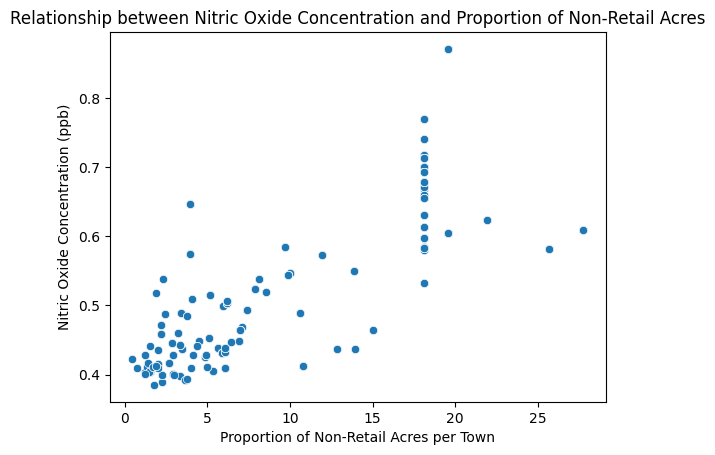

In [31]:
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Relationship between Nitric Oxide Concentration and Proportion of Non-Retail Acres')
pyplot.xlabel('Proportion of Non-Retail Acres per Town')
pyplot.ylabel('Nitric Oxide Concentration (ppb)')
pyplot.show()

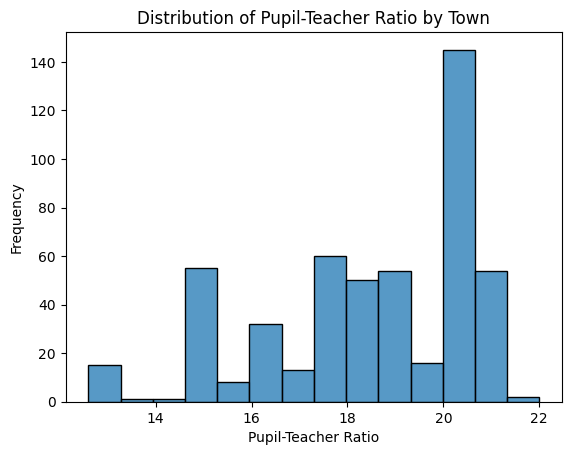

In [32]:
sns.histplot(boston_df['PTRATIO'])
pyplot.title('Distribution of Pupil-Teacher Ratio by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

In [34]:
#Null Hypothesis -> There is no significant difference in median value between houses bounded and not bounded by the Charles River
#Alternative Hypothesis -> There is a significant difference in median value between houses bounded and not bounded by the Charles River
boston_df.loc[(boston_df['CHAS'] == 0), 'RIVER_DIST'] = 'Bounded'
boston_df.loc[(boston_df['CHAS'] == 1), 'RIVER_DIST'] = 'Not Bounded'
boston_df.head(5)
scipy.stats.ttest_ind(boston_df[boston_df['RIVER_DIST'] == 'Bounded']['MEDV'], 
                      boston_df[boston_df['RIVER_DIST'] == 'Not Bounded']['MEDV'], equal_var = True)
# α = 0.05 and P Value is < .05 (α) so we reject the Null Hypothesis

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [35]:
#Null Hypothesis -> There is no significant difference in median value of houses (MEDV) for each each proportion of owner occupied units built prior to 1940 (AGE)
#Alternative Hypothesis -> There is significant difference in median value of houses (MEDV) for each each proportion of owner occupied units built prior to 1940 (AGE)
model = ols('MEDV ~ AGE', data = boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# α = 0.05 and P Value is < .05 (α) so we reject the Null Hypothesis

                sum_sq     df          F        PR(>F)
AGE        6069.761065    1.0  83.477459  1.569982e-18
Residual  36646.534350  504.0        NaN           NaN


In [36]:
#Null Hypothesis -> There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Alternative Hypothesis -> There is significant difrelationship between Nitric oxide concentrations and proportion of non-retail business acres per townference in median value of houses (MEDV) for each each proportion of owner occupied units built prior to 1940 (AGE)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [37]:
x = boston_df['DIS']
y = boston_df['MEDV']

# Perform linear regression
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:00:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes